<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework1:-Convolutional-Neural-Networks" data-toc-modified-id="Coursework1:-Convolutional-Neural-Networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework1: Convolutional Neural Networks</a></span><ul class="toc-item"><li><span><a href="#instructions" data-toc-modified-id="instructions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>instructions</a></span><ul class="toc-item"><li><span><a href="#Setting-up-working-environment" data-toc-modified-id="Setting-up-working-environment-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Setting up working environment</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Introduction</a></span></li></ul></li><li><span><a href="#bold-text" data-toc-modified-id="bold-text-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>bold text<img src="utils/resnet-block.png" alt="resnet-block"></a></span><ul class="toc-item"><li><span><a href="#Part-1-(40-points)" data-toc-modified-id="Part-1-(40-points)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Part 1 (40 points)</a></span><ul class="toc-item"><li><span><a href="#YOUR-TASK" data-toc-modified-id="YOUR-TASK-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>YOUR TASK</a></span></li></ul></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Part 2</a></span><ul class="toc-item"><li><span><a href="#Your-Task" data-toc-modified-id="Your-Task-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Your Task</a></span></li><li><span><a href="#Loading-dataset" data-toc-modified-id="Loading-dataset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Loading dataset</a></span></li></ul></li><li><span><a href="#Part-3" data-toc-modified-id="Part-3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Part 3</a></span></li></ul></li></ul></div>

# Coursework1: Convolutional Neural Networks 

## instructions

Please submit a version of this notebook containing your answers **together with your trained model** on CATe as CW2.zip. Write your answers in the cells below each question.

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory, which provides free GPU time. You will need a Google account to do so. 

Please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

You will need to install pytorch by running the following cell:

In [ ]:
!pip install torch torchvision

## Introduction

For this coursework you will implement one of the most commonly used model for image recognition tasks, the Residual Network. The architecture is introduced in 2015 by Kaiming He, et al. in the paper ["Deep residual learning for image recognition"](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf). 
<br>

In a residual network, each block contains some convolutional layers, plus "skip" connections, which allow the activations to by pass a layer, and then be summed up with the activations of the skipped layer. The image below illustrates a building block in residual networks.

# bold text![resnet-block](utils/resnet-block.png)

Depending on the number of building blocks, resnets can have different architectures, for example ResNet-50, ResNet-101 and etc. Here you are required to build ResNet-18 to perform classification on the CIFAR-10 dataset, therefore your network will have the following architecture:

![resnet](utils/resnet.png)


## Part 1 (40 points)

In this part, you will use basic pytorch operations to define the 2D convolution, max pooling operation, linear layer as well as 2d batch normalization. 

### YOUR TASK

- implement the forward pass for Conv2D, MaxPool2D, Linear and BatchNorm2d
- You are **NOT** allowed to use the torch.nn modules

In [ ]:
from math import floor
import torch
import torch.nn as nn
import torch.nn.functional as F

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height HH and width WW.

        Parameters:
        - w: Filter weights of shape (F, C, HH, WW)
        - b: Biases, of shape (F,)
        - kernel_size: Size of the convolving kernel
        - stride: The number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: The number of pixels that will be used to zero-pad the input.
        """

        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride 
        self.padding = padding
        self.bias = bias

        # Initialize the filter weights
        if type(self.kernel_size) == int:
            self.kernel_size = (self.kernel_size, self.kernel_size)
        self.w = torch.rand(self.out_channels, self.in_channels, *self.kernel_size)
        # Initialize biases if needed
        if self.bias:
            self.b = torch.rand(self.out_channels)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """

        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
  
        # We use Unfold to flatten across the window of the kernel
        input_unfold = F.unfold(x, kernel_size=self.kernel_size, padding=self.padding, stride=self.stride)
        # Align elements of filter with those of data and use matrix multiplication
        out_unfold = input_unfold.transpose(1, 2).matmul(self.w.view(self.w.size(0), -1).t()).transpose(1, 2)
        # Add constant biases
        if self.bias:
            out_unfold += torch.ones(size=out_unfold.size())*self.b.unsqueeze(1)
        # nx_out, ny_out are the output sizes for the last two dimensions
        nx_out = floor(x.size()[2] + 2*self.padding - self.w.size(2)) + 1
        ny_out = floor(x.size()[3] + 2*self.padding - self.w.size(3)) + 1
        out = F.fold(out_unfold, (nx_out, ny_out), (1, 1), padding=0)
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out

In [ ]:
# TESTING Conv2d FORWARD
C = Conv2d(in_channels=1, out_channels=3, kernel_size=(2,2),padding=1, stride=1, bias=True)
x = torch.rand(1,1,2,2)
C(x)

tensor([[[[0.9544, 0.9036, 0.3320],
          [0.6436, 1.2333, 0.6627],
          [0.2287, 0.5350, 0.1785]],

         [[0.8349, 1.0718, 0.6068],
          [0.8839, 1.1255, 0.5829],
          [0.4918, 0.5237, 0.3574]],

         [[0.9320, 1.4231, 0.6238],
          [0.6803, 0.7797, 0.2497],
          [0.2347, 0.2197, 0.1527]]]])

In [ ]:
class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: the size of the window to take a max over
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if type(kernel_size) == int:
            self.kernel_size = (kernel_size, kernel_size)
        else:
            self.kernel_size = kernel_size

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        out = torch.cat(x.unbind()).unsqueeze(0).transpose(0,1)
        out = F.unfold(out, kernel_size=self.kernel_size)
        out = out.max(dim=1, keepdim=True)[0]
        # Compute the output last two dimensions
        nx_out = x.size(2) - self.kernel_size[0] + 1
        ny_out = x.size(3) - self.kernel_size[1] + 1
        # Reorganize result to same shape as input for first two dimensions
        # and expected last two dimensions
        out = out.squeeze().view(x.size(0)*x.size(1),nx_out,ny_out)
        out = out.view(x.size(0),x.size(1),nx_out,ny_out)
    
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out

In [ ]:
# TESTING MaxPool2d FORWARD

x = torch.rand(1,2,3,3)
print('Tensor before pooling')
print(x, '\n')
M = MaxPool2d(kernel_size=2)
print('Tensor after pooling')
M(x)

Tensor before pooling
tensor([[[[0.5441, 0.9838, 0.5930],
          [0.2241, 0.5869, 0.7262],
          [0.1964, 0.0639, 0.2008]],

         [[0.7397, 0.5067, 0.3666],
          [0.7037, 0.8151, 0.8388],
          [0.9707, 0.1324, 0.9917]]]]) 

Tensor after pooling


tensor([[[[0.9838, 0.9838],
          [0.5869, 0.7262]],

         [[0.8151, 0.8388],
          [0.9707, 0.9917]]]])

In [ ]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.bias = bias
        # Initialize weights and biases
        self.w = torch.rand(self.in_channels, self.out_channels)
        self.b = torch.rand(self.out_channels)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        out = torch.matmul(x, self.w)
        # Adding bias if needed
        if self.bias:
            out += torch.ones(size= out.size()) * self.b

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out

In [ ]:
# TESTING Linear FORWARD

# Create identity
I = torch.eye(3).reshape(1,1,3,3)

# If the linear layer L is properly implemented, then it must be that
# for I = identiy on the last two dimensions we have:
# L(I) - bias - weights = 0 up to machine precision

L = Linear(in_channels=3, out_channels=3, bias=True)
(L(I) - L.b) - L.w

tensor([[[[ 0.0000e+00, -5.9605e-08,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [-5.9605e-08,  5.9605e-08,  0.0000e+00]]]])

In [ ]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: momentum – the value used for the running_mean and running_var
        computation. Default: 0.1
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        # Training parameters
        self.gamma = torch.ones(1,self.num_features,1,1)
        self.beta = torch.zeros(1,self.num_features,1,1)
        # Running parameters 
        self.running_mean = torch.zeros(self.num_features)        
        self.running_var = torch.ones(self.num_features)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # Training
        if self.training:
            # Compute mean for each channel
            m = x.mean(dim=(0,2,3), keepdim=True)
            # Compute variance for each channel
            v = ( (x - m)**2 ).mean(dim=(0,2,3), keepdim=True)
            # Compute standardized x using training mean and variance
            x_std = (x - m) / torch.sqrt( v + self.eps)
            # Update running parameters
            self.running_mean = self.momentum * self.running_mean + (1.0 - self.momentum) * m
            self.running_var = self.momentum * self.running_var + (1.0 - self.momentum) * v
        # Testing
        else:
            x_std = (x - self.running_mean) / torch.sqrt(self.running_var + self.eps)
        # scaling to have mean = beta, and var = alpha
        x = self.gamma * x_std + self.beta
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return x

In [ ]:
# TESTING BatchNorm2d FORWARD

x = torch.rand(1,2,3,3)
print('Tensor before normalizing')
print(x, '\n')
M = BatchNorm2d(num_features=2)
print('Tensor after normalizing')
M(x)

Tensor before pooling
tensor([[[[0.2051, 0.9339, 0.9037],
          [0.6745, 0.4655, 0.9551],
          [0.4108, 0.4222, 0.8801]],

         [[0.5791, 0.8995, 0.6502],
          [0.0460, 0.0157, 0.7470],
          [0.8749, 0.2059, 0.3441]]]]) 

Tensor after pooling


tensor([[[[-1.6783,  1.0704,  0.9563],
          [ 0.0919, -0.6963,  1.1502],
          [-0.9023, -0.8595,  0.8676]],

         [[ 0.2922,  1.2839,  0.5123],
          [-1.3579, -1.4517,  0.8117],
          [ 1.2076, -0.8630, -0.4352]]]])

## Part 2

In this part, you will train a ResNet-18 defined on the CIFAR-10 dataset. Code for training and evaluation are provided. 

### Your Task

1. Train your network to achieve the best possible test set accuracy after a maximum of 10 epochs of training.

2. You can use techniques such as optimal hyper-parameter searching, data pre-processing

3. If necessary, you can also use another optimizer

4. **Answer the following question:**
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? 

In [ ]:
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F

Next, we define ResNet-18:

In [ ]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
    # define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 10):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.fc = nn.Linear(512, num_classes)
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    

    def forward(self, x):
        
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
    
def ResNet18():
    return ResNet(ResidualBlock)

### Loading dataset
We will import images from the [torchvision.datasets](https://pytorch.org/docs/stable/torchvision/datasets.html) library <br>
First, we need to define the alterations (transforms) we want to perform to our images - given that transformations are applied when importing the data. <br>
Define the following transforms using the torchvision.datasets library -- you can read the transforms documentation [here](https://pytorch.org/docs/stable/torchvision/transforms.html): <br>
1. Convert images to tensor
2. Normalize mean and std of images with values:mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torch.utils.data import random_split

import torchvision.datasets as dset

import numpy as np

import torchvision.transforms as T

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################

transform = T.Compose([T.ToTensor(), T.Normalize(mean=[0.4914, 0.4822, 0.4465], 
                                     std=[0.2023, 0.1994, 0.2010])])

##############################################################
#                       END OF YOUR CODE                     #
##############################################################


Now load the dataset using the transform you defined above, with batch_size = 64<br>
You can check the documentation [here](https://pytorch.org/docs/stable/torchvision/datasets.html).
Then create data loaders (using DataLoader from torch.utils.data) for the training and test set

In [ ]:

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################

data_dir = './data'

# Get datasets
data_train = dset.CIFAR10(root=data_dir, train=True, download=True,
                          transform=transform)
data_test = dset.CIFAR10(root=data_dir, train=False, download=True,
                         transform=transform)
# Create DataLoaders
loader_train = DataLoader(dataset=data_train, batch_size=64, shuffle=True)
loader_test = DataLoader(dataset=data_test, batch_size=64, shuffle=False)

##############################################################
#                       END OF YOUR CODE                     #       
##############################################################



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
USE_GPU = True
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
    

print_every = 100
def check_accuracy(loader, model):
    # function for test accuracy on validation and test set
    
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        print(len(loader_train))
        for t, (x, y) in enumerate(loader_train): # ORGINAL: loader_train
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                # check_accuracy(loader_train, model)
                print()



In [ ]:
# code for optimising your network performance 

# try including pretrained model as well:
# https://pytorch.org/docs/stable/torchvision/models.html
# https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html#

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################

'''
   Default ResNet18 had ~81% accuracy on test set, but
   98% on training set. This indicates overfitting.
   
   We address overfitting to improve test set accuracy via two techniques: 

                (1) A regularizing approach applying a dropout with p = 0.3.
                    For this step we create a subclass of ResNet in order to 
                    implement the dropout step.

                (2) Data augmentation via random transforms on the training
                    data applied on the fly. For this step we create a new instance
                    of the training data where we include the new transforms.

    The implemented changes bring the accuracy on the test set to 86%.


    In order to apply the dropout layer I created the subclass ResNet18_2 below
    to be able to overload the forward method.
'''

# Perform data augmentation by doing random transforms
transform_train = T.Compose([T.RandomAffine(10, translate=(.05,.05), scale=(.95, 1.05)),
                             T.RandomHorizontalFlip(),
                             T.ToTensor(),
                             T.Normalize(mean=[0.4914, 0.4822, 0.4465], 
                                     std=[0.2023, 0.1994, 0.2010]) 
                             ])
# Create training dataloader
data_train = dset.CIFAR10(data_dir, train=True, download=True,
                          transform=transform_train)
loader_train = DataLoader(data_train, batch_size=64, shuffle=True)


class ResNet_2(ResNet):
    def __init__(self, ResidualBlock, num_classes=10):
        super().__init__(ResidualBlock, num_classes=num_classes)

        # initiate dropout
        self.dropout = nn.Dropout(0.30) 


    def forward(self, x):
        ''' We overload the forward method to include nn.Dropout'''
        
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        # introduce drop outs
        x = self.dropout(x) 
        
        return x

def ResNet18():
    ''' Re-defined to return ResNet_2'''
    return ResNet_2(ResidualBlock)

    
##############################################################
#                       END OF YOUR CODE                     #
##############################################################


# define and train the network
model = ResNet18()

# optimizer = optim.Adam(model.parameters()) 
optimizer = optim.Adam(model.parameters())

train_part(model, optimizer, epochs = 10) 
# train_part_early_stop(model, optimizer, epochs=10)

# report test set accuracy
check_accuracy(loader_train, model)
check_accuracy(loader_test, model)


# # save the model
torch.save(model.state_dict(), 'model_1.pt')

Files already downloaded and verified
782
Epoch: 0, Iteration 0, loss = 5.0508

Epoch: 0, Iteration 100, loss = 1.9882

Epoch: 0, Iteration 200, loss = 1.8321

Epoch: 0, Iteration 300, loss = 1.6989

Epoch: 0, Iteration 400, loss = 1.8376

Epoch: 0, Iteration 500, loss = 1.7416

Epoch: 0, Iteration 600, loss = 1.8955

Epoch: 0, Iteration 700, loss = 1.6438

782
Epoch: 1, Iteration 0, loss = 1.4218

Epoch: 1, Iteration 100, loss = 1.4234

Epoch: 1, Iteration 200, loss = 1.6185

Epoch: 1, Iteration 300, loss = 1.4182

Epoch: 1, Iteration 400, loss = 1.6079

Epoch: 1, Iteration 500, loss = 1.9666

Epoch: 1, Iteration 600, loss = 1.4330

Epoch: 1, Iteration 700, loss = 1.5355

782
Epoch: 2, Iteration 0, loss = 1.7725

Epoch: 2, Iteration 100, loss = 1.3796

Epoch: 2, Iteration 200, loss = 1.4879

Epoch: 2, Iteration 300, loss = 1.2251

Epoch: 2, Iteration 400, loss = 1.4741

Epoch: 2, Iteration 500, loss = 1.4791

Epoch: 2, Iteration 600, loss = 1.3686

Epoch: 2, Iteration 700, loss = 1.41

## Part 3

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions**: 

1. Compare the feature maps from low-level layers to high-level layers, what do you observe? 

2. Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance?

3. What are the other possible ways to analyse the performance of your network?

**YOUR ANSWER FOR PART 3 HERE**

A:

Question 1:

The lowest-level layers appear to contain information  extracted by a variety of filters applied directly on the image (these are the filters learned in training). These filters highlight neighboring points that have some commonality among them. For example, some of the low-level features capture edges; others highlight horizontal, vertical, or diagonal patterns of the image; others carry information about contast, for example highlighting all the pixels forming the shadow under the car in the image below. 

The next level of layers become a bit more abstract. They look like more agressive filters have been applied. This is expected since secondary learned features come from the output of learned filters applied on the previous layer. 

The highest-level features are patters hard for a human to recognize. They carry the algorithm's encoding of the image into something more numerical that it can classify.
  

Question 2: 

The modified network, togther with the data augmentation step, is performing with test accuracy 86% which is  better than the baseline ResNet which had 80% test accuracy. Yet, there is room from improvement. After the first few iterations the loss drops rapidly from ~3 to ~1 (66% drop) but from epoch 5 onwards the loss remains oscillating between 0.6 and 1 which means the network is getting stuck. 

Currently the network is not overfitting since the test and training accuracy values are comparable. This means we would benefit from introducing a few more more layers in the network to increase its capacity. Another way would be the network to train for longer using more than 10 epochs.  Also, the images are very low resolution so the lowest-level features have noise which affects the performance. To help reduce noise  we could use a larger dataset for the network to learn better.

Question 3:

Other ways to check the performance of the network would be look at the accuracy for each particular class of multiclass label. It can also be beneficial to use other metrics such as the confusion matrix, recall, and precision (both as averages and per class).


In [ ]:
import matplotlib.pyplot as plt

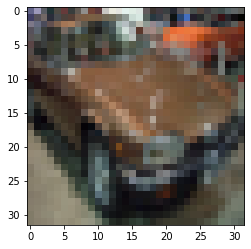

In [ ]:
image, _ = data_test[2000]
image = image.mul_(torch.tensor([0.2023, 0.1994, 0.2010]).unsqueeze(-1).unsqueeze(-1).expand(3, 32, 32)).add_(torch.tensor([0.4914, 0.4822, 0.4465]).unsqueeze(-1).unsqueeze(-1).expand(3, 32, 32))
image = T.ToPILImage()(image)
plt.imshow(image)

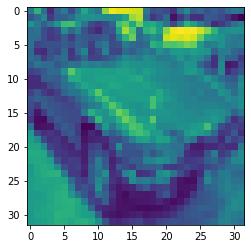

In [ ]:
data, _ = data_test[2000]
plt.imshow(data[0])

<Figure size 432x288 with 0 Axes>

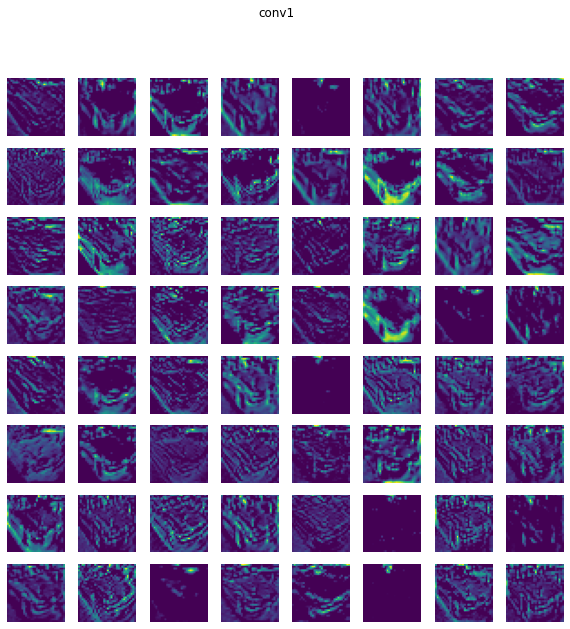

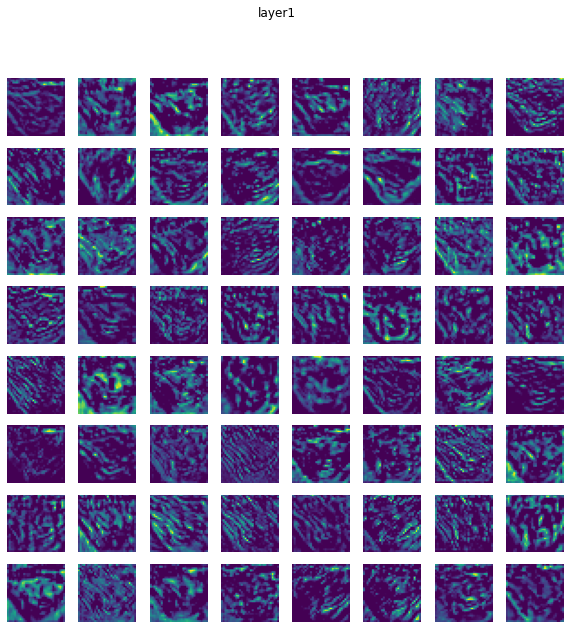

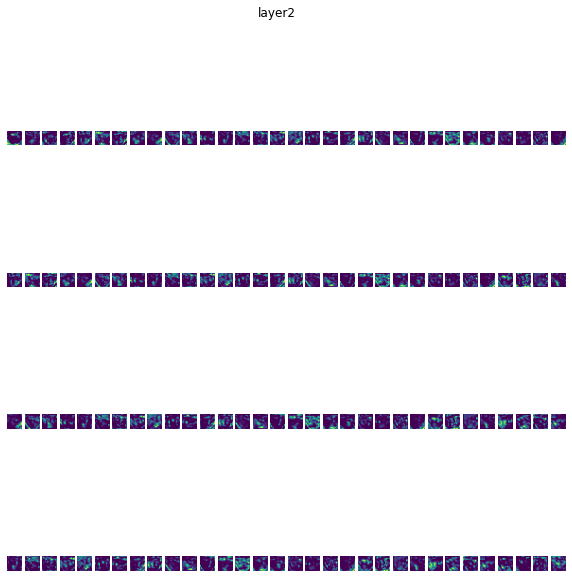

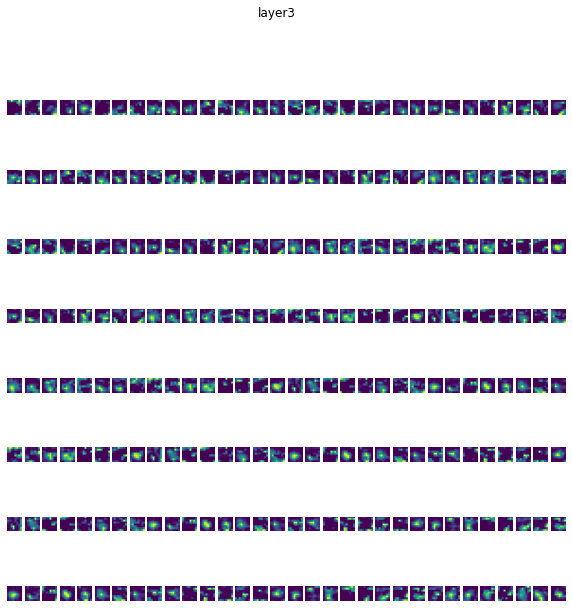

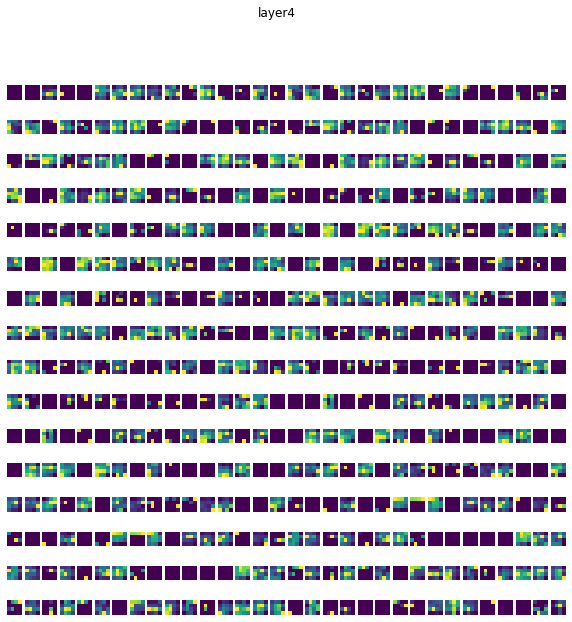

In [ ]:
#!pip install matplotlib

import matplotlib.pyplot as plt

plt.tight_layout()


activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

for l in vis_labels:

    getattr(model, l).register_forward_hook(get_activation(l))
    
    
# data, _ = cifar10_test[0]
data, _ = data_test[2000]
data = data.unsqueeze_(0).to(device = device, dtype = dtype)

output = model(data)



for idx, l in enumerate(vis_labels):

    act = activation[l].squeeze()

    if idx < 2:
        ncols = 8
    else:
        ncols = 32
        
    nrows = act.size(0) // ncols
    
    fig, axarr = plt.subplots(nrows, ncols, figsize=(10,10))
    fig.suptitle(l)


    for i in range(nrows):
        for j in range(ncols):
            axarr[i, j].imshow(act[i * nrows + j].cpu())
            axarr[i, j].axis('off')

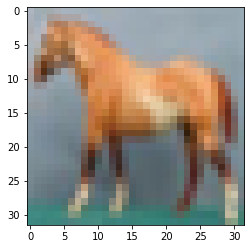

In [ ]:
image, _ = data_test[410]
image = image.mul_(torch.tensor([0.2023, 0.1994, 0.2010]).unsqueeze(-1).unsqueeze(-1).expand(3, 32, 32)).add_(torch.tensor([0.4914, 0.4822, 0.4465]).unsqueeze(-1).unsqueeze(-1).expand(3, 32, 32))
image = T.ToPILImage()(image)
plt.imshow(image)

<Figure size 432x288 with 0 Axes>

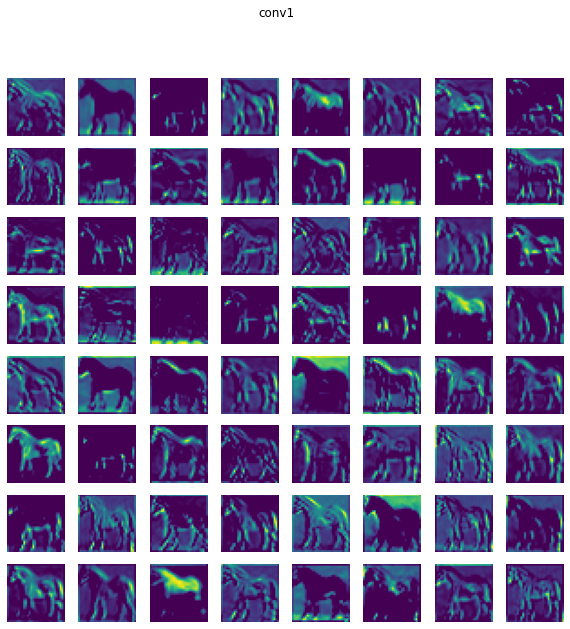

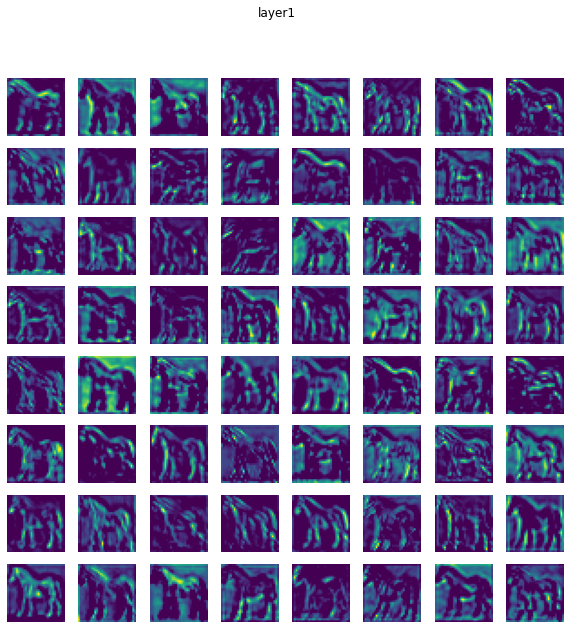

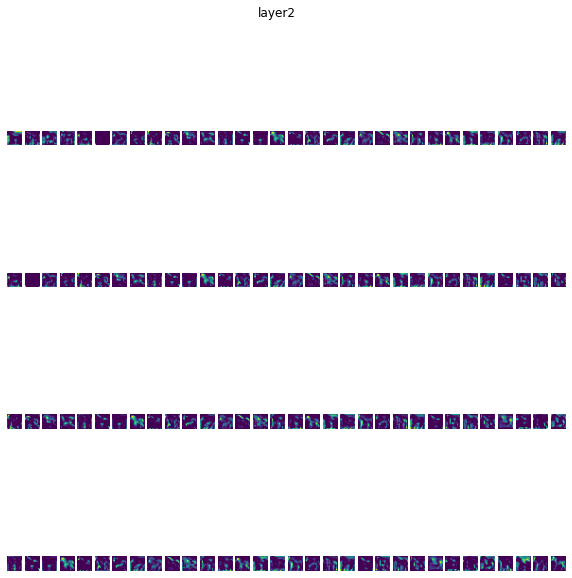

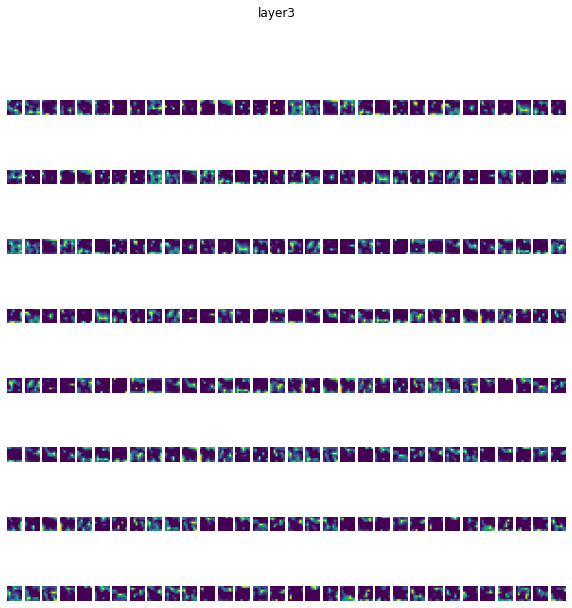

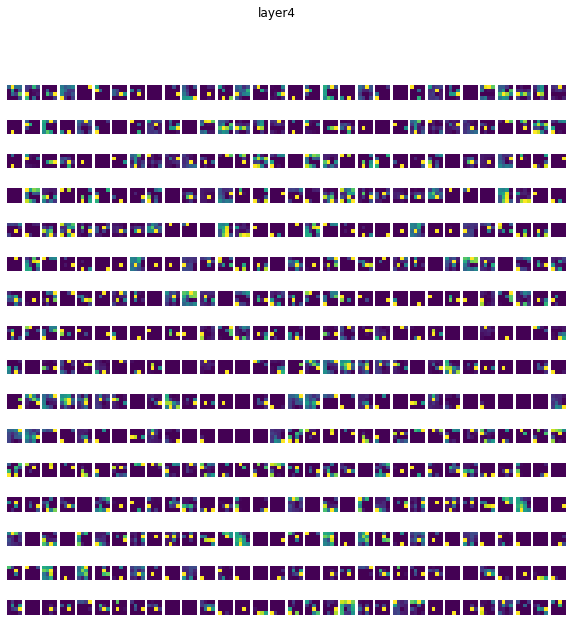

In [ ]:
#!pip install matplotlib

import matplotlib.pyplot as plt

plt.tight_layout()


activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

for l in vis_labels:

    getattr(model, l).register_forward_hook(get_activation(l))
    
    

data, _ = data_test[410]
data = data.unsqueeze_(0).to(device = device, dtype = dtype)

output = model(data)



for idx, l in enumerate(vis_labels):

    act = activation[l].squeeze()

    if idx < 2:
        ncols = 8
    else:
        ncols = 32
        
    nrows = act.size(0) // ncols
    
    fig, axarr = plt.subplots(nrows, ncols, figsize=(10,10))
    fig.suptitle(l)


    for i in range(nrows):
        for j in range(ncols):
            axarr[i, j].imshow(act[i * nrows + j].cpu())
            axarr[i, j].axis('off')